In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
from scipy import stats
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
rent_df = pd.read_excel("Metro_zori_uc_sfr_sm_month.xlsx", sheet_name="Filtered_clean")
print(rent_df.head())

principal_value_df = pd.read_excel("Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.xlsx", sheet_name="Filtered_cleaned")
principal_value_df.head()

   MonthYear  Minneapolis, MN   Duluth, MN  Rochester, MN          USA
0 2018-01-31      1651.229431  1285.898298    1324.459656  1456.475558
1 2018-02-28      1666.570082  1282.255189    1373.733893  1464.487214
2 2018-03-31      1675.741524  1273.994196    1394.786511  1475.718777
3 2018-04-30      1688.432775  1272.153748    1420.143102  1486.921656
4 2018-05-31      1695.923052  1288.003275    1416.106843  1496.455010


,MonthYear,"Minneapolis, MN","Duluth, MN","Rochester, MN",USA
0,2018-01-31,272790.391700,153019.204829,218363.967261,221632.860267
1,2018-02-28,274889.696695,153307.688686,219632.614341,222835.587782
2,2018-03-31,277166.902005,153919.747485,220774.265507,224222.991098
3,2018-04-30,279441.449079,154623.054771,221707.680088,225480.804030
4,2018-05-31,281434.591075,155506.518195,222588.557622,226703.051359


In [3]:
# Rent

rent_df.head().round()
print(rent_df.columns)

Index(['MonthYear', 'Minneapolis, MN', 'Duluth, MN', 'Rochester, MN', 'USA'], dtype='object')


In [4]:
# principal value

principal_value_df.head().round()

,MonthYear,"Minneapolis, MN","Duluth, MN","Rochester, MN",USA
0,2018-01-31,272790.0,153019.0,218364.0,221633.0
1,2018-02-28,274890.0,153308.0,219633.0,222836.0
2,2018-03-31,277167.0,153920.0,220774.0,224223.0
3,2018-04-30,279441.0,154623.0,221708.0,225481.0
4,2018-05-31,281435.0,155507.0,222589.0,226703.0


In [5]:
# Assuming that the data extracrted is the home value and 30 yr mortgage, principal value
monthly_principal_payment_minneapolis = principal_value_df["Minneapolis, MN"]/30/12
monthly_principal_payment_minneapolis.head().round()

0    758.0
1    764.0
2    770.0
3    776.0
4    782.0
Name: Minneapolis, MN, dtype: float64

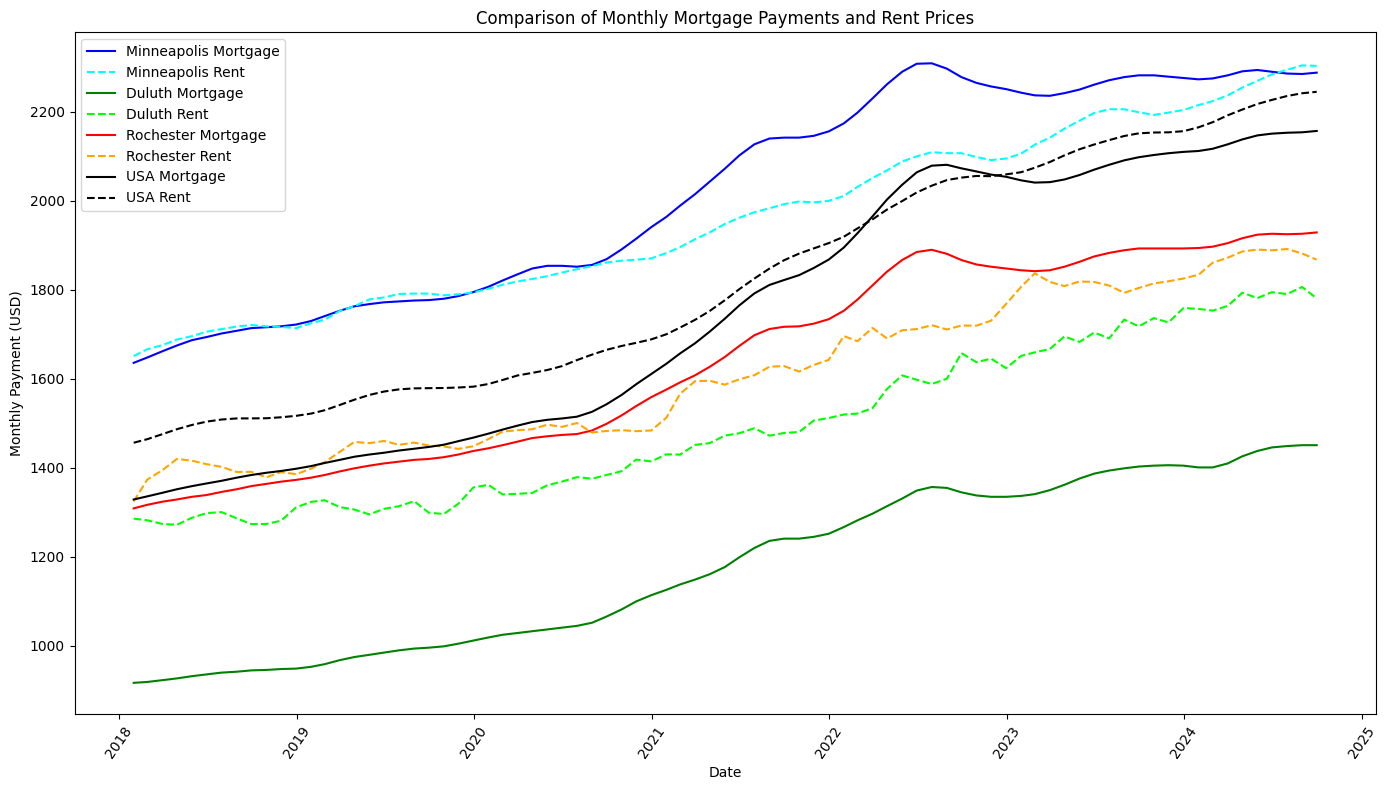

In [6]:
# Calculate monthly mortgage payment and interest for each city and add to DataFrame based on term and rate. 
loan_term_years = 30
annual_interest_rate = 6.0
monthly_interest_rate = annual_interest_rate / 100 / 12
number_of_payments = loan_term_years * 12

def calculate_monthly_payment(principal): # Function to calculate interest given term and rate
    return principal * (monthly_interest_rate * (1 + monthly_interest_rate)**number_of_payments) / ((1 + monthly_interest_rate)**number_of_payments - 1)

principal_value_df["Minneapolis_Mortgage"] = principal_value_df["Minneapolis, MN"].apply(calculate_monthly_payment).round() # The .apply() method is 
# used to apply the calculate_monthly_payment function to each value in the "Duluth, MN" column as the principal argument. The function will compute 
# the monthly mortgage payment based on the principal value (home price) for each row.
principal_value_df["Duluth_Mortgage"] = principal_value_df["Duluth, MN"].apply(calculate_monthly_payment).round() 
principal_value_df["Rochester_Mortgage"] = principal_value_df["Rochester, MN"].apply(calculate_monthly_payment).round()
principal_value_df["USA_Mortgage"] = principal_value_df["USA"].apply(calculate_monthly_payment).round()


# Merge DataFrames on 'MonthYear'
merged_df = pd.merge(principal_value_df, rent_df, on="MonthYear", suffixes=("_mortgage", "_rent")) # Needed to avoid conflicts between 
merged_df = merged_df = merged_df.bfill()  # Backward fill
# the 2 dateframes having the same column names. 

# Plotting the merged data with updated suffixes
plt.figure(figsize=(14, 8))

plt.plot(merged_df["MonthYear"], merged_df["Minneapolis_Mortgage"], label="Minneapolis Mortgage", color="blue")
plt.plot(merged_df["MonthYear"], merged_df["Minneapolis, MN_rent"], label="Minneapolis Rent", color="cyan", linestyle="--")

plt.plot(merged_df["MonthYear"], merged_df["Duluth_Mortgage"], label="Duluth Mortgage", color="green")
plt.plot(merged_df["MonthYear"], merged_df["Duluth, MN_rent"], label="Duluth Rent", color="lime", linestyle="--")

plt.plot(merged_df["MonthYear"], merged_df["Rochester_Mortgage"], label="Rochester Mortgage", color="red")
plt.plot(merged_df["MonthYear"], merged_df["Rochester, MN_rent"], label="Rochester Rent", color="orange", linestyle="--")

plt.plot(merged_df["MonthYear"], merged_df["USA_Mortgage"], label="USA Mortgage", color="black")
plt.plot(merged_df["MonthYear"], merged_df["USA_rent"], label="USA Rent", color="black", linestyle="--")

# Add labels and legend
plt.xlabel("Date")
plt.ylabel("Monthly Payment (USD)")
plt.title("Comparison of Monthly Mortgage Payments and Rent Prices")
plt.legend(loc="upper left")
plt.xticks(rotation=55)
plt.tight_layout()
plt.show()

In [7]:
# The Duluth rent has missing values. 
# Possibly we can find a way to fill them in using trends of Mpls and Rochester? Or find the average from 2022 - 2023? 
# Used merged_df = merged_df = merged_df.bfill() since the trend line was downward at that point. 

In [8]:
data = [
    merged_df["Minneapolis_Mortgage"],
    merged_df["Minneapolis, MN_rent"],
    merged_df["Duluth_Mortgage"],
    merged_df["Duluth, MN_rent"],
    merged_df["Rochester_Mortgage"],
    merged_df["Rochester, MN_rent"],
    merged_df["USA_Mortgage"],
    merged_df["USA_rent"]
]

In [12]:
labels = [
    "Minneapolis Mortgage",
    "Minneapolis Rent",
    "Duluth Mortgage",
    "Duluth Rent",
    "Rochester Mortgage",
    "Rochester Rent",
    "USA Mortgage",
    "USA Rent"
]

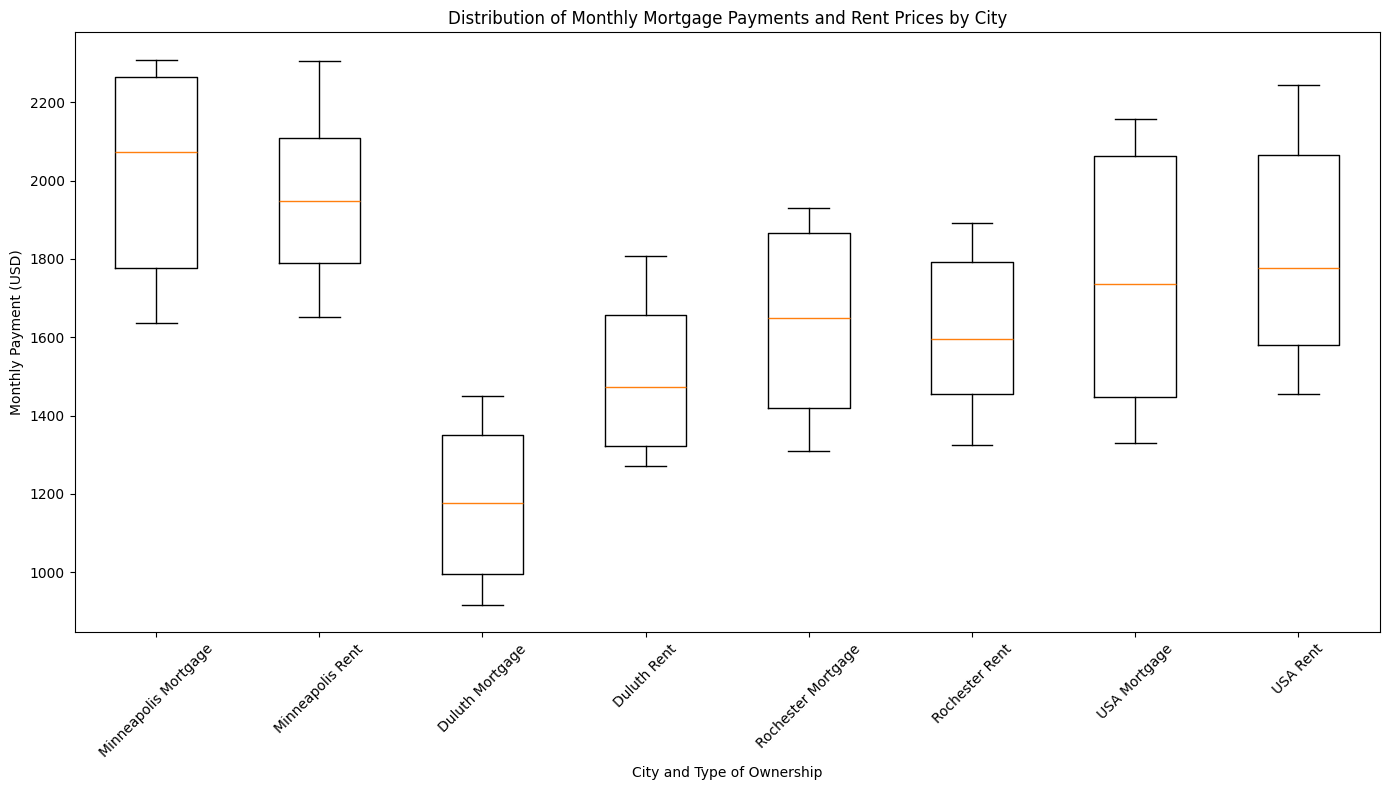

In [14]:
plt.figure(figsize=(14, 8))
plt.boxplot(data, tick_labels=labels)
plt.xlabel("City and Type of Ownership")
plt.ylabel("Monthly Payment (USD)")
plt.title("Distribution of Monthly Mortgage Payments and Rent Prices by City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

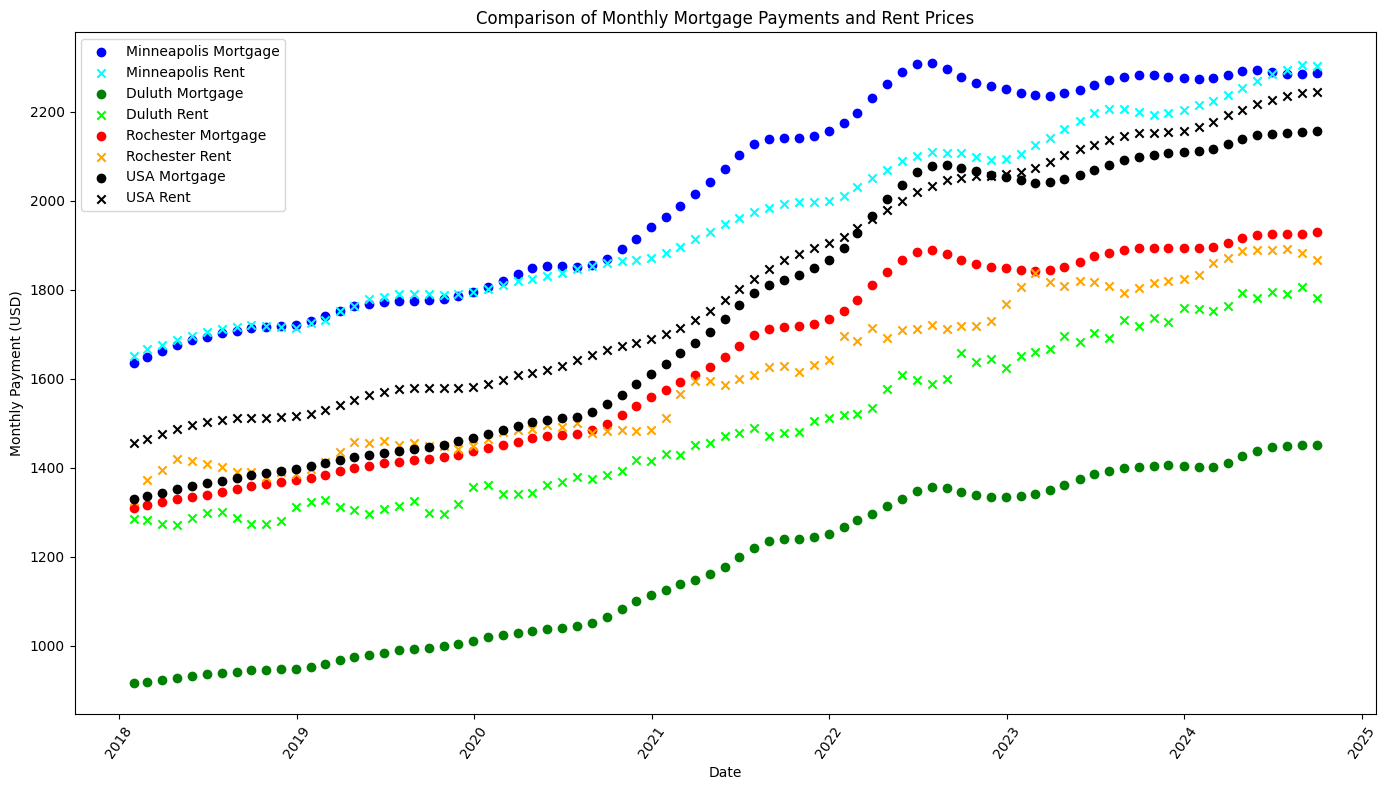

In [16]:
plt.figure(figsize=(14, 8))

# Scatter plots for each city's mortgage and rent
plt.scatter(merged_df["MonthYear"], merged_df["Minneapolis_Mortgage"], label="Minneapolis Mortgage", color="blue", marker='o')
plt.scatter(merged_df["MonthYear"], merged_df["Minneapolis, MN_rent"], label="Minneapolis Rent", color="cyan", marker='x')

plt.scatter(merged_df["MonthYear"], merged_df["Duluth_Mortgage"], label="Duluth Mortgage", color="green", marker='o')
plt.scatter(merged_df["MonthYear"], merged_df["Duluth, MN_rent"], label="Duluth Rent", color="lime", marker='x')

plt.scatter(merged_df["MonthYear"], merged_df["Rochester_Mortgage"], label="Rochester Mortgage", color="red", marker='o')
plt.scatter(merged_df["MonthYear"], merged_df["Rochester, MN_rent"], label="Rochester Rent", color="orange", marker='x')

plt.scatter(merged_df["MonthYear"], merged_df["USA_Mortgage"], label="USA Mortgage", color="black", marker='o')
plt.scatter(merged_df["MonthYear"], merged_df["USA_rent"], label="USA Rent", color="black", marker='x')

# Add labels and legend
plt.xlabel("Date")
plt.ylabel("Monthly Payment (USD)")
plt.title("Comparison of Monthly Mortgage Payments and Rent Prices")
plt.legend(loc="upper left")
plt.xticks(rotation=55)
plt.tight_layout()
plt.show()
